## Import
Import `numpy`, `pandas`, and `matplotlib.pyplot`.

- `numpy` contains a large collection of mathematical functions
- `pandas` is a software library for Python that is designed for data manipulation and data analysis
- `matplotlib.pyplot` contains functions to create interactive plots

We will be using these three libraries in this Notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset Representation

This dataset given (`Dataset3.csv`) is composed solely of raw data without any explicit description or context. Before anything else, the dataset will be properly loaded into the notebook using the [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function so that we may observe its contents.

In [2]:
book_df = pd.read_csv('Dataset3.csv', index_col=0)
book_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.0,5.0,4.0,NaN,1.0,3.0,4.0,1.0,5.0,NaN,...,3.0,5.0,NaN,2.0,NaN,1.0,4.0,5.0,3.0,4.0
1,NaN,NaN,5.0,3.0,4.0,1.0,4.0,NaN,NaN,1.0,...,5.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0
2,2.0,4.0,1.0,NaN,NaN,4.0,3.0,NaN,4.0,4.0,...,3.0,2.0,4.0,NaN,3.0,2.0,4.0,5.0,1.0,4.0
3,3.0,5.0,1.0,5.0,1.0,3.0,5.0,3.0,2.0,4.0,...,1.0,2.0,2.0,2.0,5.0,4.0,NaN,NaN,3.0,NaN
4,NaN,NaN,5.0,3.0,2.0,1.0,4.0,NaN,4.0,1.0,...,3.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,5.0,5.0,2.0,NaN,NaN,3.0,2.0,4.0,5.0,...,4.0,1.0,NaN,5.0,NaN,2.0,5.0,4.0,3.0,4.0
96,3.0,4.0,NaN,3.0,NaN,3.0,NaN,1.0,3.0,2.0,...,4.0,3.0,1.0,4.0,5.0,5.0,3.0,2.0,4.0,NaN
97,2.0,2.0,2.0,NaN,4.0,1.0,1.0,4.0,5.0,3.0,...,4.0,4.0,5.0,2.0,5.0,4.0,2.0,NaN,4.0,4.0
98,1.0,5.0,NaN,NaN,1.0,5.0,5.0,4.0,4.0,NaN,...,3.0,2.0,5.0,4.0,NaN,3.0,3.0,5.0,3.0,2.0


Taking an initial look at the dataset, it seems that the values only range from 1-5. To confirm this assumption, the [`unique`](https://pandas.pydata.org/docs/reference/api/pandas.unique.html) function is used to check for all unique values seen in the dataset.

In [3]:
# initialize the list
list_of_values = []

# iterate through all 100 rows
for i in range(100):
    # get all uniques values per row and appends to a list
    list_of_values = list_of_values + book_df.T.iloc[i].unique().tolist()

# convert the list into an numpy.array so the np.unique function can be used
list_of_values = np.array(list_of_values)
np.unique(list_of_values)

array([ 1.,  2.,  3.,  4.,  5., nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan])

Looking at the data shown above, it is proven that the values consist only of the numbers 1, 2, 3, 4, 5. Moreover, some of the cells have no value, which is represented by the NaN symbol. 


### Data Mining Techinique
Considering this, it can be reasonably concluded that out of the three types of data mining techniques discussed, this is a **collaborative filtering dataset**. To rule out the other options, an association rule mining dataset should comprise of varied sets of items and a clustering dataset typically has floating-point values. All things considered, the biggest indication that points to this dataset being a collaborative filtering dataset is the limitation of the values that appear in the dataset. Collaborative filtering datasets revolve around analyzing user ratings for items, movies, and the like; these ratings are usually quantified as set values, like values on a scale of 1 to 5.

More specifically, we would be utilizing an item-item collaborative filtering data mining technique which would mean we would be focusing on the similarity between each item. Compared to user-user collaborative filtering, item-item collaborative filtering is more widely used. This is due to the fact that user-based collaborative filtering suffers from several issues (e.g. the number of people that rate items is low, new users have little to no information, more users means greater cost in finding the nearest K neighbors); these issues are avoided entirely by item-item collaborative filtering as ratings tend to be more consistent and reliable.

### Structure of the Dataset
With this in mind, we would be treating the data given as an assortment of reader ratings on different books. We would be renaming the rows and columns of the DataFrame as a reflection of this assumption.

In [4]:
col_names = []
row_names = []

for i in range(100):
    row_names.append("Book " + str(i))

for i in range(300):
    col_names.append("Reader " + str(i))
    
book_df.index = row_names
book_df.columns = col_names

book_df

,Reader 0,Reader 1,Reader 2,Reader 3,Reader 4,Reader 5,Reader 6,Reader 7,Reader 8,Reader 9,...,Reader 290,Reader 291,Reader 292,Reader 293,Reader 294,Reader 295,Reader 296,Reader 297,Reader 298,Reader 299
Book 0,1.0,5.0,4.0,NaN,1.0,3.0,4.0,1.0,5.0,NaN,...,3.0,5.0,NaN,2.0,NaN,1.0,4.0,5.0,3.0,4.0
Book 1,NaN,NaN,5.0,3.0,4.0,1.0,4.0,NaN,NaN,1.0,...,5.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0
Book 2,2.0,4.0,1.0,NaN,NaN,4.0,3.0,NaN,4.0,4.0,...,3.0,2.0,4.0,NaN,3.0,2.0,4.0,5.0,1.0,4.0
Book 3,3.0,5.0,1.0,5.0,1.0,3.0,5.0,3.0,2.0,4.0,...,1.0,2.0,2.0,2.0,5.0,4.0,NaN,NaN,3.0,NaN
Book 4,NaN,NaN,5.0,3.0,2.0,1.0,4.0,NaN,4.0,1.0,...,3.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Book 95,1.0,5.0,5.0,2.0,NaN,NaN,3.0,2.0,4.0,5.0,...,4.0,1.0,NaN,5.0,NaN,2.0,5.0,4.0,3.0,4.0
Book 96,3.0,4.0,NaN,3.0,NaN,3.0,NaN,1.0,3.0,2.0,...,4.0,3.0,1.0,4.0,5.0,5.0,3.0,2.0,4.0,NaN
Book 97,2.0,2.0,2.0,NaN,4.0,1.0,1.0,4.0,5.0,3.0,...,4.0,4.0,5.0,2.0,5.0,4.0,2.0,NaN,4.0,4.0
Book 98,1.0,5.0,NaN,NaN,1.0,5.0,5.0,4.0,4.0,NaN,...,3.0,2.0,5.0,4.0,NaN,3.0,3.0,5.0,3.0,2.0


Each row in the dataset represents a unique book. According to the information shown above, 100 books were rated by the readers.

Each column in the dataset represents a particular reader's rating of a book. There are 300 readers in the dataset, each of which has given at least 1 book in the dataset a rating between 1 and 5. Books for which the reader has not given a rating is represented by NaN.

# Exploratory Data Analysis
With the dataset given, there is a considerable amount of raw data to process and analyze. Before performing any data mining procedures, it is good practice to do exploratory data analysis to observe patterns and detect any outliers in the dataset. With this, we can properly identify particular relationships between specific variables.

**Two exploratory data analysis questions have been identified and formulated:** <br> 
1. Out of 100 books, which book has the highest average rating? <br> 
2. How dispersed are the values for `Book 0`? What are the values of its central tendencies?

To answer these questions, we used numerical summaries which include the measures of central tendency and the measures of dispersion. Additionally, we used visualization techiniques, namely a bar graph and a box plot, in order to present and illustrate relationships in the data.

### Out of 100 books, which book has the highest average rating?
Since collaborative filtering mainly deals with the reader's rating for a given item, we want to examine the average ratings of the books and see which book has the highest average rating among readers. 

It should be noted that in getting the average of the book's ratings in this data set, we do not have to worry about any possible outliers. As established earlier, ratings only range from 1 to 5, so the presence of any outliers are impossible.

The mean of each books can be computed using the [`mean`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) function in Pandas. This would return the average rating of the readers per book. It is also important to take note that, by default, it ignores NaN values. The [`sort_values`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) function was also utilized to arrange the average ratings per book in descending order so that we can easily see the top ratings.

In [5]:
mean = book_df.mean(axis=1, skipna=True)
mean.sort_values(ascending=False)

Book 41    3.217213
Book 51    3.160000
Book 27    3.157895
Book 53    3.155378
Book 79    3.142857
             ...   
Book 23    2.836653
Book 38    2.836576
Book 88    2.834677
Book 4     2.820408
Book 1     2.786008
Length: 100, dtype: float64

To better visualize the results we have obtained from using the previously mentioned functions, we can use the [`plot.bar`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html) function of Pandas to display a bar graph using the given data. 

In this scenario, a bar graph is the most applicable graph as different groups of data (average rating per book) are being compared with each other. With this, the book with the highest average rating relative to other books can be easily seen.

<AxesSubplot:>

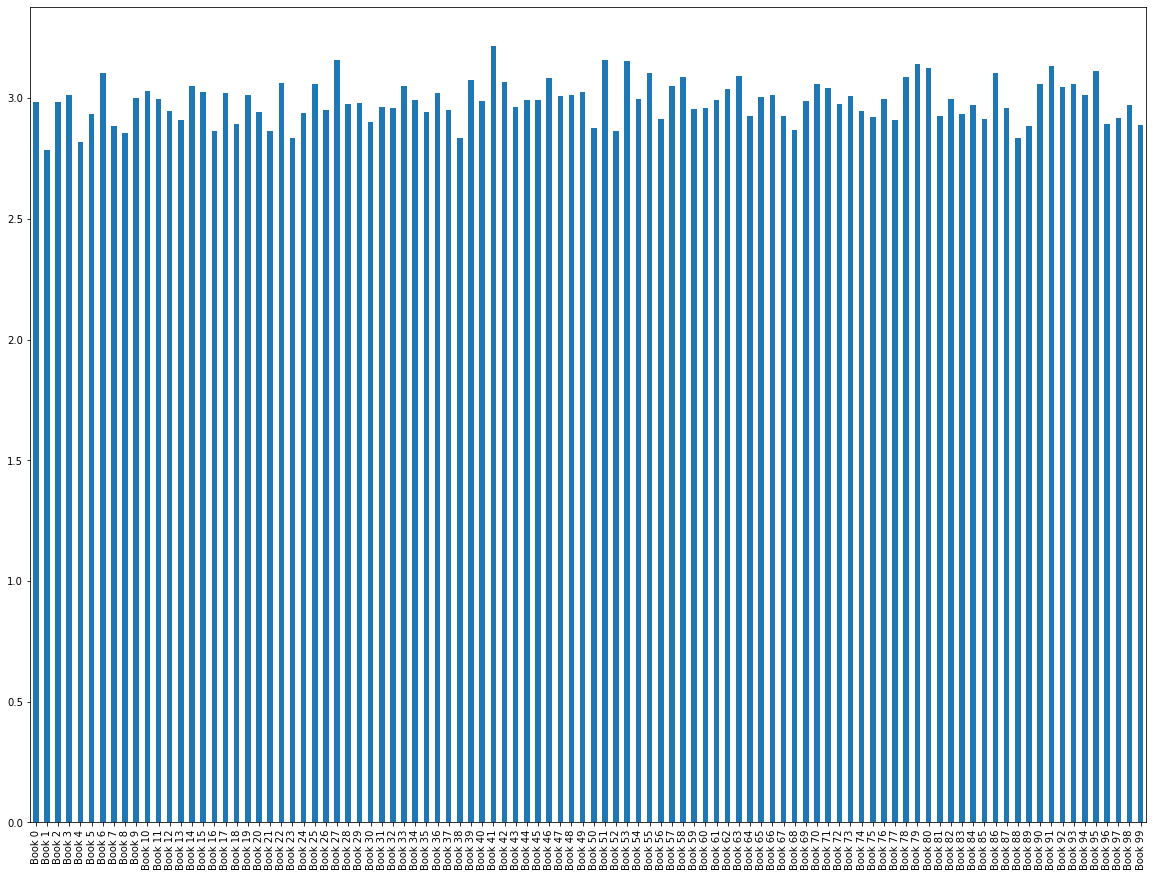

In [6]:
mean.plot.bar(figsize=(20, 15))

From both the result of using the [`mean`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) function and the bar graph, we can see that `Book 41` has the highest average rating.

### How dispersed are the values for `Book 0`? What are the values of its central tendencies?
In this part, we aim to determine the distribution of the ratings for readers of `Book 0` and its relationship to its measure of central tendencies. More specifically, we would be interpreting the data based on the interquartile range, mean, mode, and median.

To be able to do this, we must first compute for the interquartile range (IQR). IQR is computed by subtracting the first quartile (the average of the median and the lowest value) from the third quartile (the average of the median and the highest value) or mathemetically, we can compute the **interquartile range** using the formula:

$$IQR = Q3 - Q1$$

To compute for Q1 and Q3, we can use the [`nanquantile`](https://numpy.org/doc/stable/reference/generated/numpy.nanquantile.html) function. This function computes for the *n*th quantile, with n being the second parameter, while ignore the NaN values. However, since we are only focusing on `Book 0`, we need to use the [`iloc`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html) function on the DataFrame so that we could get only the ratings for `Book 0`.

In [7]:
Q3 = np.nanquantile(book_df.iloc[0], 0.75)
Q1 = np.nanquantile(book_df.iloc[0], 0.25)
IQR = Q3 - Q1
print("Q1  of Book 0 : %.2f" % (Q1))
print("Q3  of Book 0 : %.2f" % (Q3))
print("IQR of Book 0 : %.2f" % (IQR))

Q1  of Book 0 : 2.00
Q3  of Book 0 : 4.00
IQR of Book 0 : 2.00


In [8]:
book_df.iloc[0]

Reader 0      1.0
Reader 1      5.0
Reader 2      4.0
Reader 3      NaN
Reader 4      1.0
             ... 
Reader 295    1.0
Reader 296    4.0
Reader 297    5.0
Reader 298    3.0
Reader 299    4.0
Name: Book 0, Length: 300, dtype: float64

Since we want to compare the dispersion of the ratings to its central tendencies, the next thing we need to do is to compute for the mean, median and the mode of `Book 0`. This can be done by using the [`mean`](https://pandas.pydata.org/docs/reference/api/pandas.Series.mean.html), [`median`](https://pandas.pydata.org/docs/reference/api/pandas.Series.median.html), and [`mode`](https://pandas.pydata.org/docs/reference/api/pandas.Series.mode.html) functions.

In [9]:
print("Mean:", book_df.iloc[0].mean())
print("Median:", book_df.iloc[0].median())
print("Mode:", book_df.iloc[0].mode(dropna=True))

Mean: 2.983402489626556
Median: 3.0
Mode: 0    1.0
dtype: float64


As seen above, the mean is 2.98, the median is 3.0, and the mode is 1.0.

From these values, we can see that the median and the mean are close to each other, with a difference of approximately 0.017. The ratings of `Book 0` is also uni-modal, with only 1.0 as its mode.

Since we have computed for the values of the first and third quartile, the interquartile range and the median, we can use a box plot to visually show the computed values. This can be done using the [`plot.box`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html) function. 

<AxesSubplot:>

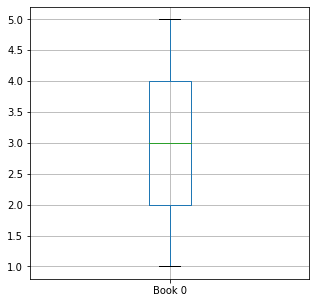

In [10]:
book_df.iloc[0].plot.box(grid='True', figsize=(5, 5))

Based on the box plot, we can see that there are no outliers for the ratings of `Book 0` as there are no unusually high or low values above its upper whisker or below its lower whisker. This means that there is no rating that is distinctly different (i.e. at least 1.5 times the IQR below $Q1$ or higher than $Q3$) from the rest of the ratings. This would imply that for a rating to be considered an outlier, it should not be within the range of -1 to 7. However, since our values are only from 1 to 5, we can be sure that there would be no outliers.

This can also be cross-checked with the values retrieved earlier. From these values, it can be said that the dispersion of values should be almost symmetrical (not necessarily bell-shaped) because the values of the mean and the median are close to each other.

Going back to the question at hand, from the values of the Q1, Q3, and IQR obtained earlier, we can conclude that the middle 50% of our data is spread from a rating of 2 to 4 with an IQR of 2.

# Data Mining
As we have identified that the most appropriate mining technique for this data set is to perform Collaborative Filtering, our goal in this section is to correctly identify the top five books that are most similar to `Book 0`. 

In order to do this, we would be importing `CollaborativeFiltering` class. 

In this class, we have created different functions that would handle the different steps in answering this question: (1) computing for the mean of each book, (2) normalizing the values of each book based on its row mean, (3) getting the cosine similarity of each book to `Book 0`, and (4) determining which are the top five books based on the computed cosine similarity.

In [11]:
from collaborative_filtering import CollaborativeFiltering

After importing this class, we have to instantiate a CollaborativeFiltering object with the parameter `5`. This parameter refers to the number of similar books that we want to find from our list of books. 

In [12]:
cfilter = CollaborativeFiltering(5)

Now that we have imported and instantiated the CollaborativeFiltering class, we can start performing data mining techniques using the functions of the class.

### Step 1: Calculating for the Row mean
In order to determine the the top 5 books that are the most similar to `Book 0`, we would need to calculate the row mean. The row mean is calculated by adding all the non-NaN values, and dividing the sum with number of non-NaN values per row. 

$$mean_{i} = \frac{\sum{rating_{ij}}}{n_{i}}$$
where $mean_{i}$ is the row mean for book *i*, $rating_{ij}$ is the rating of costumer *j* for book *i*, and $n_{i}$ is the number of non-NaN ratings for book *i*

This can be done by calling the `get_row_mean` function inside our CollaborativeFiltering class. This `get_row_mean` function makes use of the [`mean`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) function in Pandas.

In [13]:
mean = cfilter.get_row_mean(book_df)
mean

Book 0     2.983402
Book 1     2.786008
Book 2     2.983806
Book 3     3.011905
Book 4     2.820408
             ...   
Book 95    3.112500
Book 96    2.892430
Book 97    2.919831
Book 98    2.971311
Book 99    2.887550
Length: 100, dtype: float64

### Step 2: Normalizing the data
Since readers might have a different way of rating each book (e.g. Reader 0 might give 1 for books that are uninteresting to her, but Reader 1 might give a 3 for the same reason), we have to normalize the data. This is done in order to scale the ratings of each reader to a common scale. Normalizing the data is done by subtracting the rating given by a reader to a book by the mean of the ratings of that book. This is done through the `normalize_data` function inside the `CollaborativeFiltering` class, which makes use of the [`isinstance`](https://docs.python.org/3/library/functions.html) function to check for the datatype of the parameters and the [`subtract`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.subtract.html) function to get the difference between a rating and the row mean.

In normalizing the data, a positive value means that the reader rated the book higher than average, while a negative value means that the reader rated it lower than the average. 

In [14]:
normalized_df = cfilter.normalize_data(book_df, mean)
normalized_df.round(2)

,Reader 0,Reader 1,Reader 2,Reader 3,Reader 4,Reader 5,Reader 6,Reader 7,Reader 8,Reader 9,...,Reader 290,Reader 291,Reader 292,Reader 293,Reader 294,Reader 295,Reader 296,Reader 297,Reader 298,Reader 299
Book 0,-1.98,2.02,1.02,NaN,-1.98,0.02,1.02,-1.98,2.02,NaN,...,0.02,2.02,NaN,-0.98,NaN,-1.98,1.02,2.02,0.02,1.02
Book 1,NaN,NaN,2.21,0.21,1.21,-1.79,1.21,NaN,NaN,-1.79,...,2.21,1.21,-0.79,-1.79,-1.79,-1.79,-0.79,0.21,2.21,1.21
Book 2,-0.98,1.02,-1.98,NaN,NaN,1.02,0.02,NaN,1.02,1.02,...,0.02,-0.98,1.02,NaN,0.02,-0.98,1.02,2.02,-1.98,1.02
Book 3,-0.01,1.99,-2.01,1.99,-2.01,-0.01,1.99,-0.01,-1.01,0.99,...,-2.01,-1.01,-1.01,-1.01,1.99,0.99,NaN,NaN,-0.01,NaN
Book 4,NaN,NaN,2.18,0.18,-0.82,-1.82,1.18,NaN,1.18,-1.82,...,0.18,-1.82,-1.82,-0.82,-0.82,-0.82,-1.82,-0.82,NaN,2.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Book 95,-2.11,1.89,1.89,-1.11,NaN,NaN,-0.11,-1.11,0.89,1.89,...,0.89,-2.11,NaN,1.89,NaN,-1.11,1.89,0.89,-0.11,0.89
Book 96,0.11,1.11,NaN,0.11,NaN,0.11,NaN,-1.89,0.11,-0.89,...,1.11,0.11,-1.89,1.11,2.11,2.11,0.11,-0.89,1.11,NaN
Book 97,-0.92,-0.92,-0.92,NaN,1.08,-1.92,-1.92,1.08,2.08,0.08,...,1.08,1.08,2.08,-0.92,2.08,1.08,-0.92,NaN,1.08,1.08
Book 98,-1.97,2.03,NaN,NaN,-1.97,2.03,2.03,1.03,1.03,NaN,...,0.03,-0.97,2.03,1.03,NaN,0.03,0.03,2.03,0.03,-0.97


### Step 3: Computing for the Cosine Similarity of the other books to `Book 0`
After normalizing the data, we can now compute for the cosine similarity of the books to `Book 0`. In this case, cosine similarity measures how different or similar two books are between the range of -1 to 1, with -1 being the most different and 1 as the most similar. 

In computing for the cosine similarity, we are going to be following the formula:

$$similarity (A, B) = \frac{\sum{A_i B_i}}{ \sqrt{A_i^2}\sqrt{B_i^2}}$$

where *A* represents `Book 0`, and *B* represents the current book that we are comparing to `Book 0`.

To be able to compute for the cosine similarity between `Book 0` and the rest of the books, we would be using a [`for`](https://docs.python.org/3/tutorial/controlflow.html#for-statements) loop to iterate from `Book 1` to `Book 99`. Every iteration, we would pass it to the `get_cosine_similarity` function declared in our `CollaborativeFiltering` class. In this function, we made us of the [`isinstance`](https://docs.python.org/3/library/functions.html) function, [`sum`](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) function, [`sqrt`](https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html) function, and lastly, the [`square`](https://numpy.org/doc/stable/reference/generated/numpy.square.html) function.

In [15]:
for i in range(1, 100):
    sim = cfilter.get_cosine_similarity(normalized_df.iloc[0, :], normalized_df.iloc[i, :])
    print('Cosine similarity of Book 0 and Book', str(i).rjust(2),  ':', '{:.2f}'.format(sim).rjust(5))

Cosine similarity of Book 0 and Book  1 :  0.03
Cosine similarity of Book 0 and Book  2 : -0.01
Cosine similarity of Book 0 and Book  3 : -0.03
Cosine similarity of Book 0 and Book  4 : -0.02
Cosine similarity of Book 0 and Book  5 : -0.00
Cosine similarity of Book 0 and Book  6 :  0.08
Cosine similarity of Book 0 and Book  7 : -0.04
Cosine similarity of Book 0 and Book  8 :  0.04
Cosine similarity of Book 0 and Book  9 :  0.05
Cosine similarity of Book 0 and Book 10 :  0.06
Cosine similarity of Book 0 and Book 11 : -0.02
Cosine similarity of Book 0 and Book 12 :  0.06
Cosine similarity of Book 0 and Book 13 : -0.08
Cosine similarity of Book 0 and Book 14 :  0.10
Cosine similarity of Book 0 and Book 15 : -0.05
Cosine similarity of Book 0 and Book 16 : -0.03
Cosine similarity of Book 0 and Book 17 : -0.01
Cosine similarity of Book 0 and Book 18 :  0.01
Cosine similarity of Book 0 and Book 19 : -0.05
Cosine similarity of Book 0 and Book 20 :  0.05
Cosine similarity of Book 0 and Book 21 

### Step 4: Determining the top 5 similar books to `Book 0`
Since we have computed for the cosine similarity between `Book 0` and the rest of the books, we just need to determine the 5 books with the highest cosine similarity value. 

Inside our `CollaborativeFiltering` class, we have declared a `get_k_similar` function that would return the top *k* similar items given the list of books to compare, and our basis book (i.e. `Book 0`). This function utilizes the [`nlargest`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html) function in Pandas to get the largest value in the cosine similarity column.

However, it is important to note that the `get_k_similar` function inside the `CollaborativeFiltering` class also calls the functions indicated in the previous steps. This means that we can directly call the `get_k_similar` function after instantiating the class. However, the step-by-step procedure was still shown in order to explain the process in getting the top 5 similar items to `Book 0`.

In [16]:
book0 = book_df.iloc[0, :]
other_books = book_df.iloc[1:, :]
similar_books = cfilter.get_k_similar(other_books, book0)
print(similar_books[1].round(2))

Book 38    0.15
Book 53    0.13
Book 76    0.12
Book 65    0.12
Book 14    0.10
dtype: float64


# Insights and Conclusions
Now that the necessary data mining procedures were conducted, we may now form our insights and conclusions regarding the dataset.

Based on the results obtained by using the `CollaborativeFiltering` class, the top 5 most similar books to `Book 0` are books `Book 38`, `Book 53`, `Book 76`, `Book 65`, and `Book 14`.

These findings were obtained using the data mining procedures for item-item collaborative filtering, which involves normalizing the data, computing for the cosine similarity of each book compared to Book 0, and getting the Top 5 books with the highest cosine similarity. Each of these steps are essential in determining accurately which books are most similar to Book 0.

By normalizing the data before calculating for the cosine similarity, we can disregard the ratings of readers who have not rated the book (represented as NaN values), and we also remove reader preferences in rating. The cosine similarity was then used as it is an accurate measure of how similar two items are. With this, the 5 books with the highest cosine similarity can be concluded as the top 5 most similar books to `Book 0`.

## References
Cosine similarity. Neo4j Graph Database Platform. (n.d.). Retrieved September 11, 2021, from https://neo4j.com/docs/graph-data-science/current/alpha-algorithms/cosine/. 

How the shape of a histogram reflects the statistical mean and median. Dummies. (2021, July 12). Retrieved September 11, 2021, from https://www.dummies.com/education/math/statistics/how-the-shape-of-a-histogram-reflects-the-statistical-mean-and-median/. 

Python: Change column names and row indexes in pandas dataframe. GeeksforGeeks. (2020, May 16). Retrieved September 11, 2021, from https://www.geeksforgeeks.org/python-change-column-names-and-row-indexes-in-pandas-dataframe/. 